In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle


In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d anthonytherrien/depression-dataset

Dataset URL: https://www.kaggle.com/datasets/anthonytherrien/depression-dataset
License(s): CC-BY-SA-4.0
 92% 8.00M/8.69M [00:01<00:00, 12.9MB/s]
100% 8.69M/8.69M [00:01<00:00, 8.37MB/s]


In [5]:
!unzip /content/depression-dataset.zip

Archive:  /content/depression-dataset.zip
  inflating: depression_data.csv     


In [6]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset

df = pd.read_csv('/content/depression_data.csv')
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [8]:
# checking the dataset size

df.shape

(413768, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [10]:
# checking for null values
df.isnull().any()

,0
Name,False
Age,False
Marital Status,False
Education Level,False
Number of Children,False
Smoking Status,False
Physical Activity Level,False
Employment Status,False
Income,False
Alcohol Consumption,False


In [11]:
df.isnull().sum()

,0
Name,0
Age,0
Marital Status,0
Education Level,0
Number of Children,0
Smoking Status,0
Physical Activity Level,0
Employment Status,0
Income,0
Alcohol Consumption,0


In [ ]:
# null values in the numerical columns replace with mean or median
# null values in the categorical columns replace with mode

In [ ]:
# for numerical columns - null values replacement

# df['Income'].fillna(df['Income'].median, inplace = True)


# for the categorical columns - null values replacement

# df.['Employment Status'].fillna(df['Employment Status'].mode, inplace =True)

In [12]:
# Checking the descriptive statistics of the data

df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [ ]:
df.head(3)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No


In [13]:
df =df.drop(columns = 'Name', axis = 1)

In [14]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [15]:
df['Marital Status'].unique()

array(['Married', 'Widowed', 'Divorced', 'Single'], dtype=object)

In [ ]:
df['Education Level'].unique()

array(["Bachelor's Degree", 'High School', "Master's Degree",
       'Associate Degree', 'PhD'], dtype=object)

In [ ]:
df['Smoking Status'].unique()

array(['Non-smoker', 'Former', 'Current'], dtype=object)

In [ ]:
df['Physical Activity Level'].unique()

array(['Active', 'Sedentary', 'Moderate'], dtype=object)

In [ ]:
df['Employment Status'].unique()

array(['Unemployed', 'Employed'], dtype=object)

In [ ]:
df['Chronic Medical Conditions'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Marital Status'].value_counts()

Marital Status
Married     240444
Single       72110
Widowed      68485
Divorced     32729
Name: count, dtype: int64

In [ ]:
df['Education Level'].value_counts()

Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64

In [ ]:
df['Smoking Status'].value_counts()

Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64

In [ ]:
df['Chronic Medical Conditions'].value_counts()

Chronic Medical Conditions
No     277561
Yes    136207
Name: count, dtype: int64

In [ ]:
df['Number of Children'].value_counts()

Number of Children
0    155232
2     83961
1     83925
3     76974
4     13676
Name: count, dtype: int64

## Visualizations

### 1.Univariate Analysis

<Axes: ylabel='Income'>

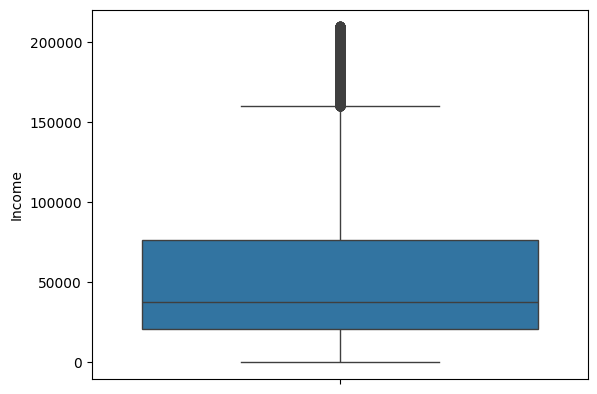

In [ ]:
sns.boxplot(df.Income)

<ipython-input-34-b8af2bbb715b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Income)


<Axes: xlabel='Income', ylabel='Density'>

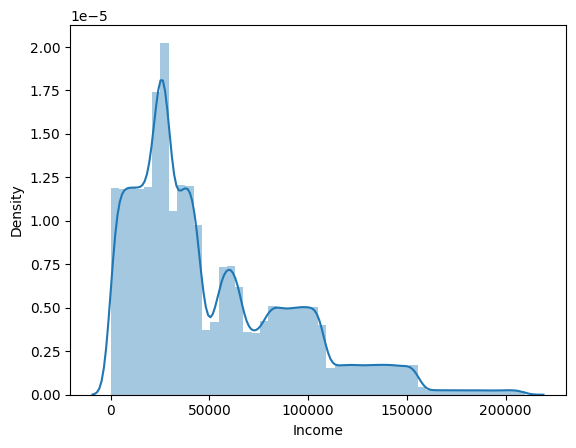

In [ ]:
sns.distplot(df.Income)

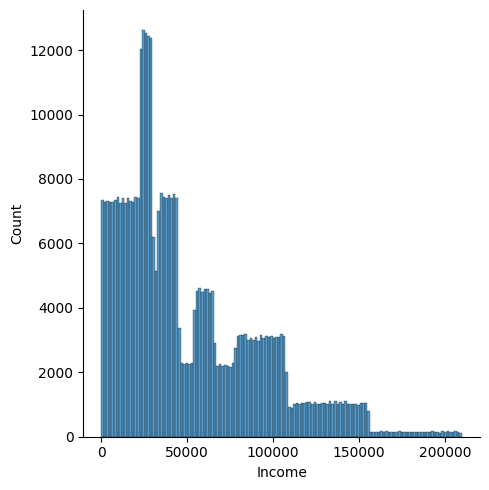

In [ ]:
sns.displot(df.Income)

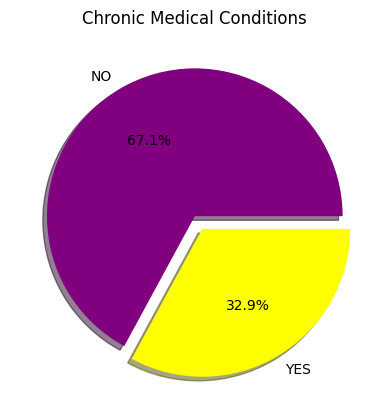

In [ ]:
plt.pie(df['Chronic Medical Conditions'].value_counts(),[0,0.1],labels = ['NO','YES'], autopct = '%1.1f%%',colors=['purple','yellow'],shadow = True)
plt.title('Chronic Medical Conditions')
plt.show()


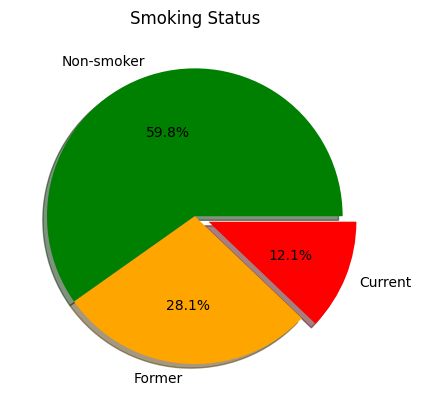

In [ ]:
plt.pie(df['Smoking Status'].value_counts(), [0,0,0.1], labels= ['Non-smoker','Former','Current'], autopct = '%1.1f%%', shadow = True,colors = ['green','orange','red'])
plt.title('Smoking Status')
plt.show()

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize']=8,8

<ipython-input-46-5b04d5a15fbc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =df['Education Level'].value_counts().index, y =df['Education Level'].value_counts(),palette ='husl')


<Axes: xlabel='Education Level', ylabel='count'>

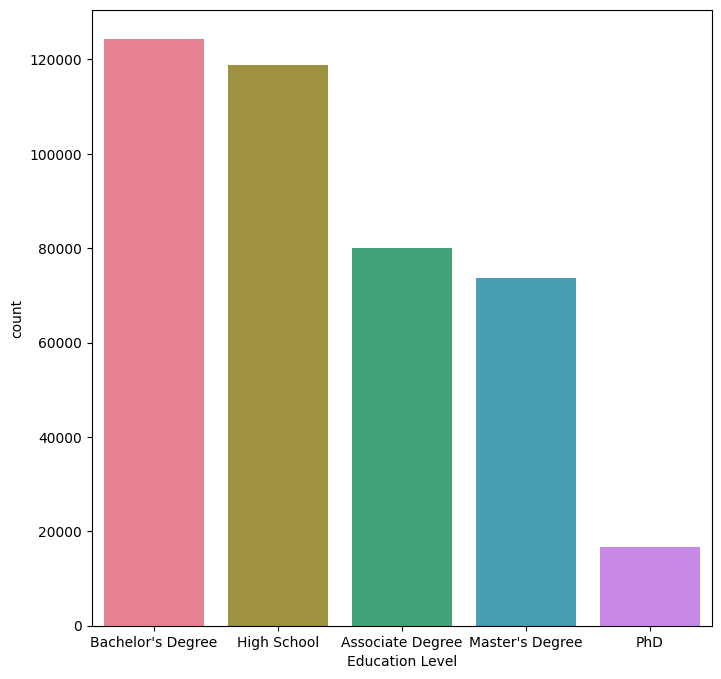

In [ ]:
sns.barplot(x =df['Education Level'].value_counts().index, y =df['Education Level'].value_counts(),palette ='husl')

<ipython-input-48-a8438759263f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Marital Status'].value_counts().index,y=df['Marital Status'].value_counts(),palette='Spectral')


<Axes: xlabel='Marital Status', ylabel='count'>

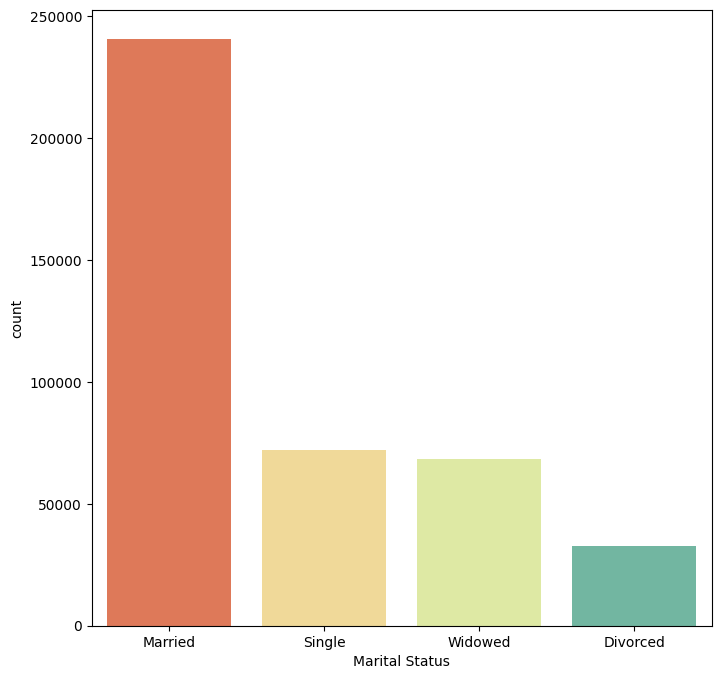

In [ ]:
sns.barplot(x=df['Marital Status'].value_counts().index,y=df['Marital Status'].value_counts(),palette='Spectral')

### Bivartiate Analysis

<ipython-input-51-8855fe558cd6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df['Smoking Status'],y = df['Chronic Medical Conditions'], palette = 'Set1', data =df)


<Axes: xlabel='Smoking Status', ylabel='Chronic Medical Conditions'>

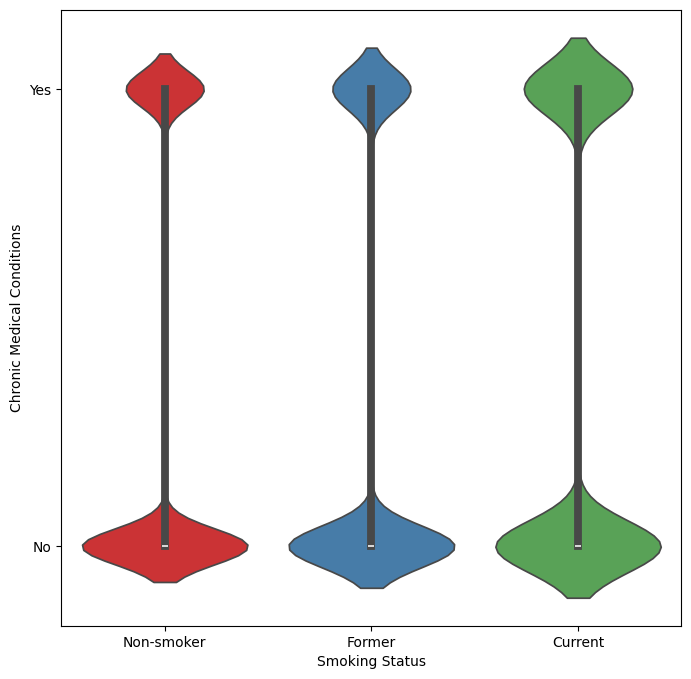

In [ ]:
sns.violinplot(x = df['Smoking Status'],y = df['Chronic Medical Conditions'], palette = 'Set1', data =df)

<ipython-input-60-e2b8b8bac614>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Marital Status', y = 'Age',kind = 'box', data=df, palette='flare')


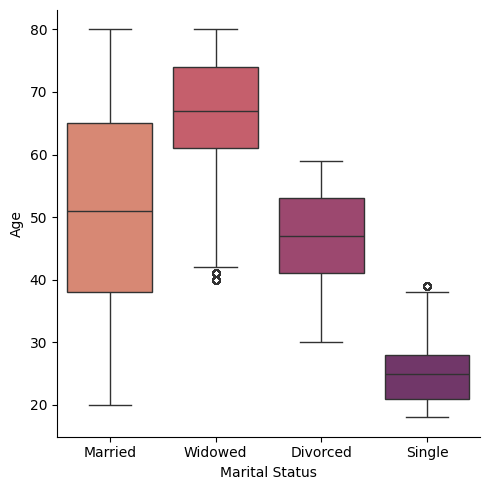

In [ ]:
sns.catplot(x='Marital Status', y = 'Age',kind = 'box', data=df, palette='flare')

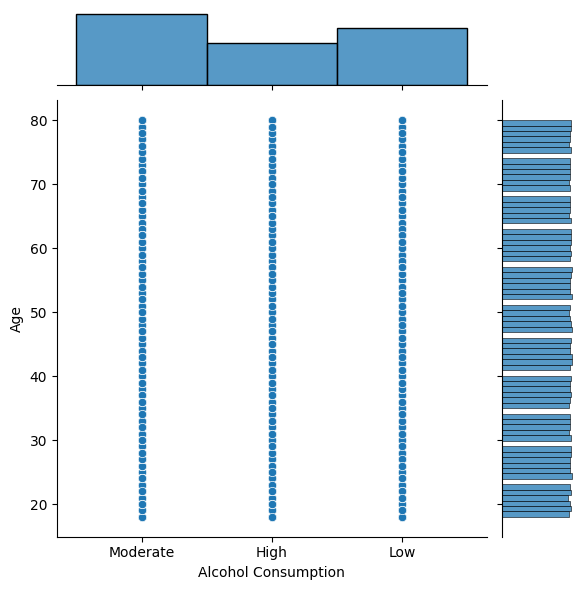

In [ ]:
sns.jointplot(x='Alcohol Consumption',y='Age',data=df)

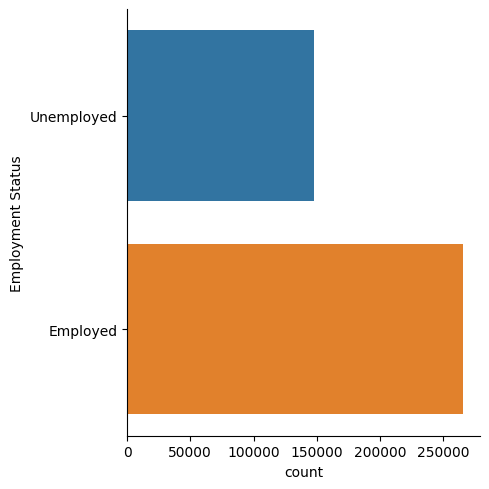

In [ ]:
sns.catplot(y ='Employment Status',hue=['Employment Status'],kind = 'count',data =df)

<Axes: xlabel='Age', ylabel='Income'>

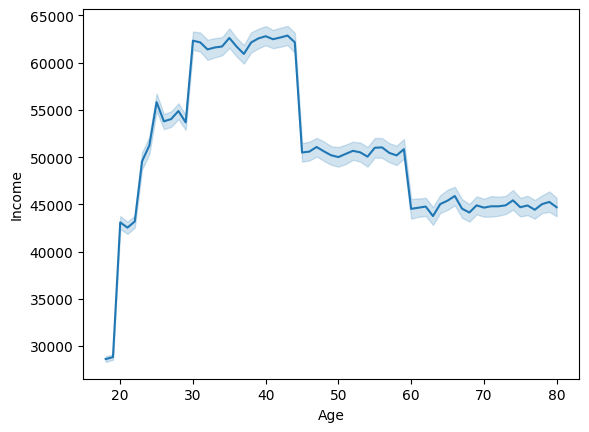

In [16]:
sns.lineplot(x=df.Age,y=df.Income)

## Multivariate Analysis

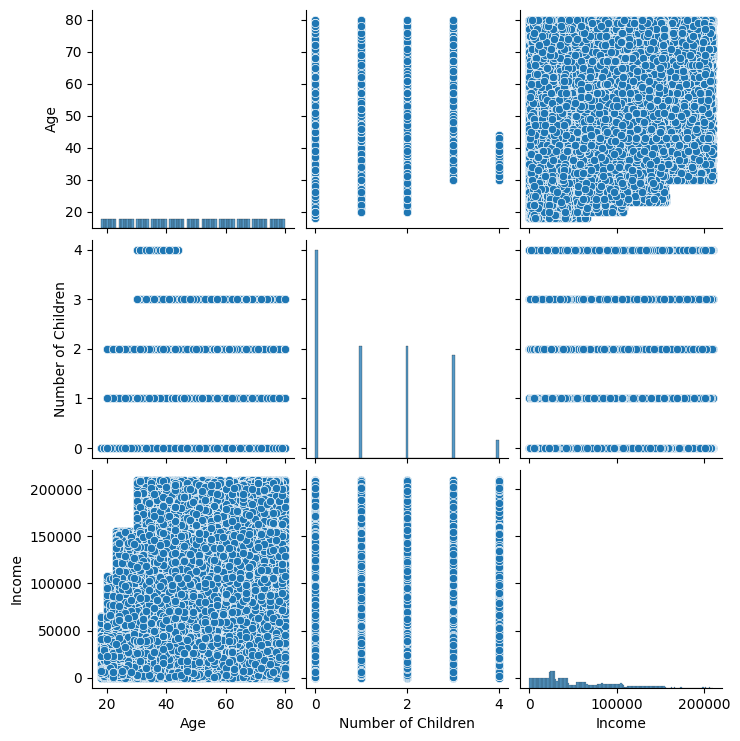

In [ ]:
sns.pairplot(df)

In [17]:
df.corr()

ValueError: could not convert string to float: 'Married'

### Outlier Detection

<Axes: ylabel='Income'>

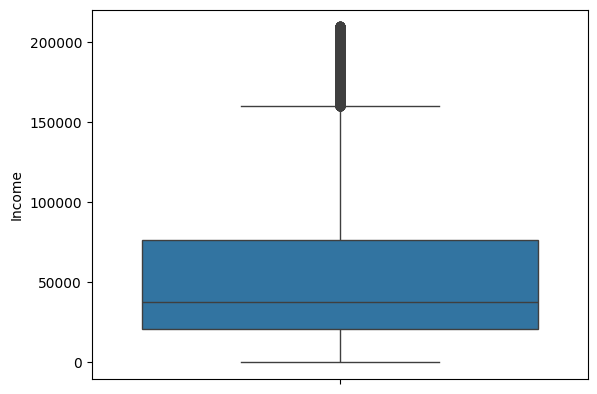

In [18]:
sns.boxplot(df.Income)

### Outlier Treatment  - Replacing outliers with Upperlimit

In [ ]:
# Upper_ limit = Q3+1.5*IQR
# Lower_limit = Q1-1.5*IQR

In [19]:
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [20]:
Q3 = df.Income.quantile(0.75)
Q1 = df.Income.quantile(0.25)

In [21]:
Q3

76616.3

In [22]:
Q1

21001.03

In [23]:
IQR = Q3-Q1

In [24]:
IQR

55615.270000000004

In [26]:
Upper_limit = Q3+1.5*IQR
Upper_limit

160039.20500000002

In [27]:
df['Income']=np.where(df['Income']>Upper_limit,160039,df['Income'])

<Axes: ylabel='Income'>

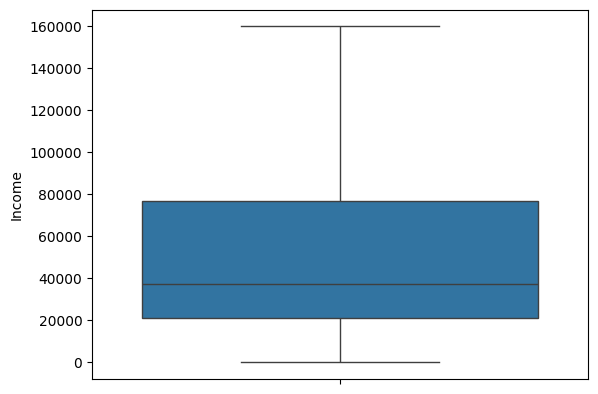

In [28]:
sns.boxplot(df.Income)

## Encoding Techniques

In [29]:
df.head(3)

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No


### 1.Label encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
df['Marital Status'] = le.fit_transform(df['Marital Status'])

In [32]:
df.head(3)

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,1,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,1,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,3,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No


In [33]:
df['Education Level'] = le.fit_transform(df['Education Level'])
df['Smoking Status'] = le.fit_transform(df['Smoking Status'])
df['Physical Activity Level'] = le.fit_transform(df['Physical Activity Level'])
df['Employment Status'] = le.fit_transform(df['Employment Status'])
df['Dietary Habits'] = le.fit_transform(df['Dietary Habits'])
df['Sleep Patterns'] = le.fit_transform(df['Sleep Patterns'])
df['History of Mental Illness'] = le.fit_transform(df['History of Mental Illness'])
df['History of Substance Abuse'] = le.fit_transform(df['History of Substance Abuse'])
df['Chronic Medical Conditions'] = le.fit_transform(df['Chronic Medical Conditions'])
df['Family History of Depression'] = le.fit_transform(df['Family History of Depression'])



In [34]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,1,1,2,2,0,1,26265.67,Moderate,1,0,1,0,1,1
1,55,1,2,1,2,2,0,42710.36,High,2,0,1,0,0,1
2,78,3,3,1,2,2,0,125332.79,Low,2,1,0,0,1,0
3,58,0,3,3,2,1,1,9992.78,Moderate,1,2,0,0,0,0
4,18,2,2,0,2,2,1,8595.08,Low,1,0,1,0,1,1


### 2.One hot encoding techniques

In [36]:
df1 = pd.get_dummies(df,columns = ['Alcohol Consumption'])
df1.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Moderate
0,31,1,1,2,2,0,1,26265.67,1,0,1,0,1,1,False,False,True
1,55,1,2,1,2,2,0,42710.36,2,0,1,0,0,1,True,False,False
2,78,3,3,1,2,2,0,125332.79,2,1,0,0,1,0,False,True,False
3,58,0,3,3,2,1,1,9992.78,1,2,0,0,0,0,False,False,True
4,18,2,2,0,2,2,1,8595.08,1,0,1,0,1,1,False,True,False


In [37]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,1,1,2,2,0,1,26265.67,Moderate,1,0,1,0,1,1
1,55,1,2,1,2,2,0,42710.36,High,2,0,1,0,0,1
2,78,3,3,1,2,2,0,125332.79,Low,2,1,0,0,1,0
3,58,0,3,3,2,1,1,9992.78,Moderate,1,2,0,0,0,0
4,18,2,2,0,2,2,1,8595.08,Low,1,0,1,0,1,1


In [38]:
df['Alcohol Consumption'] = le.fit_transform(df['Alcohol Consumption'])


In [39]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,1,1,2,2,0,1,26265.67,2,1,0,1,0,1,1
1,55,1,2,1,2,2,0,42710.36,0,2,0,1,0,0,1
2,78,3,3,1,2,2,0,125332.79,1,2,1,0,0,1,0
3,58,0,3,3,2,1,1,9992.78,2,1,2,0,0,0,0
4,18,2,2,0,2,2,1,8595.08,1,1,0,1,0,1,1


In [40]:
df.corr()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
Age,1.000000,0.108468,0.034884,0.259268,0.285934,0.383360,0.217613,-0.068689,-0.007485,0.049183,0.012007,0.024683,-0.024388,0.107310,-0.017625
Marital Status,0.108468,1.000000,-0.004018,-0.166820,0.027463,0.028578,0.051218,-0.059366,-0.003916,0.029377,-0.053945,0.007178,0.001163,0.180402,-0.000261
Education Level,0.034884,-0.004018,1.000000,0.017454,0.010072,0.019560,0.008094,0.269981,-0.015127,-0.112566,0.001508,-0.018947,0.000864,0.004171,-0.000803
Number of Children,0.259268,-0.166820,0.017454,1.000000,0.072386,0.138686,0.030502,0.027833,-0.002663,0.000355,0.104357,0.002713,-0.008061,0.081044,-0.006997
Smoking Status,0.285934,0.027463,0.010072,0.072386,1.000000,0.106708,0.071795,-0.029192,0.099886,-0.022876,-0.054841,0.005256,-0.057317,0.031587,-0.041631
Physical Activity Level,0.383360,0.028578,0.019560,0.138686,0.106708,1.000000,0.076949,-0.014886,-0.086855,0.329470,0.006778,0.008566,-0.009604,0.046298,-0.030727
Employment Status,0.217613,0.051218,0.008094,0.030502,0.071795,0.076949,1.000000,-0.665122,-0.086438,0.014437,0.092668,0.140764,-0.003981,0.025649,0.042413
Income,-0.068689,-0.059366,0.269981,0.027833,-0.029192,-0.014886,-0.665122,1.000000,0.028651,-0.178713,-0.055967,-0.138677,0.000331,-0.007659,-0.028898
Alcohol Consumption,-0.007485,-0.003916,-0.015127,-0.002663,0.099886,-0.086855,-0.086438,0.028651,1.000000,-0.028885,-0.020300,-0.012422,-0.010559,-0.002813,-0.012397
Dietary Habits,0.049183,0.029377,-0.112566,0.000355,-0.022876,0.329470,0.014437,-0.178713,-0.028885,1.000000,0.001999,0.027351,0.001553,0.005944,-0.014439


<Axes: >

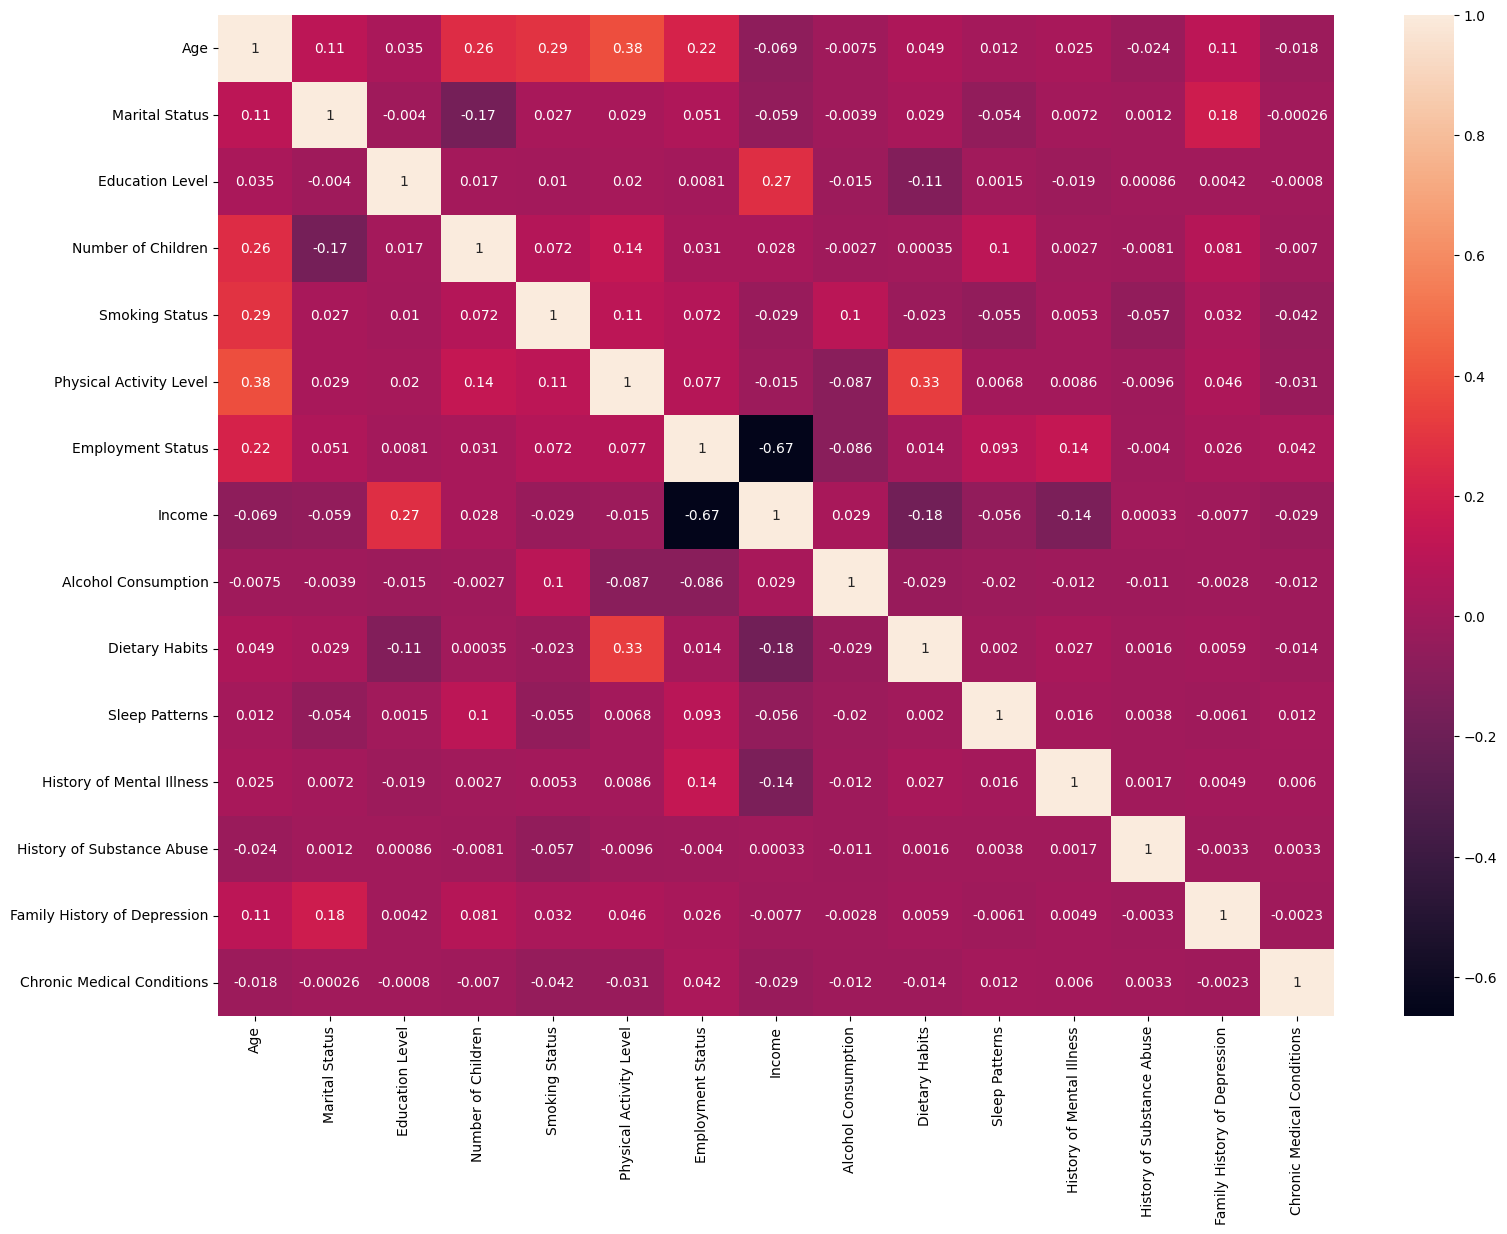

In [44]:
plt.figure(figsize =(18,13))
sns.heatmap(df.corr(), annot =True)

In [46]:
df.corr()['Chronic Medical Conditions'].sort_values(ascending= False)

,Chronic Medical Conditions
Chronic Medical Conditions,1.000000
Employment Status,0.042413
Sleep Patterns,0.011549
History of Mental Illness,0.006038
History of Substance Abuse,0.003307
Marital Status,-0.000261
Education Level,-0.000803
Family History of Depression,-0.002274
Number of Children,-0.006997
Alcohol Consumption,-0.012397


## X and y split, independent variable and dependent variable

In [47]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,1,1,2,2,0,1,26265.67,2,1,0,1,0,1,1
1,55,1,2,1,2,2,0,42710.36,0,2,0,1,0,0,1
2,78,3,3,1,2,2,0,125332.79,1,2,1,0,0,1,0
3,58,0,3,3,2,1,1,9992.78,2,1,2,0,0,0,0
4,18,2,2,0,2,2,1,8595.08,1,1,0,1,0,1,1


In [50]:
X = df.iloc[:,:-1]
X.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression
0,31,1,1,2,2,0,1,26265.67,2,1,0,1,0,1
1,55,1,2,1,2,2,0,42710.36,0,2,0,1,0,0
2,78,3,3,1,2,2,0,125332.79,1,2,1,0,0,1
3,58,0,3,3,2,1,1,9992.78,2,1,2,0,0,0
4,18,2,2,0,2,2,1,8595.08,1,1,0,1,0,1


In [51]:
y= df['Chronic Medical Conditions']
y.head()

,Chronic Medical Conditions
0,1
1,1
2,0
3,0
4,1


In [52]:
X.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression
0,31,1,1,2,2,0,1,26265.67,2,1,0,1,0,1
1,55,1,2,1,2,2,0,42710.36,0,2,0,1,0,0
2,78,3,3,1,2,2,0,125332.79,1,2,1,0,0,1
3,58,0,3,3,2,1,1,9992.78,2,1,2,0,0,0
4,18,2,2,0,2,2,1,8595.08,1,1,0,1,0,1


## Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [55]:
scaled_x = pd.DataFrame(scale.fit_transform(X),columns = X.columns)
scaled_x.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression
0,0.209677,0.333333,0.25,0.50,1.0,0.0,1.0,0.164118,1.0,0.5,0.0,1.0,0.0,1.0
1,0.596774,0.333333,0.50,0.25,1.0,1.0,0.0,0.266873,0.0,1.0,0.0,1.0,0.0,0.0
2,0.967742,1.000000,0.75,0.25,1.0,1.0,0.0,0.783138,0.5,1.0,0.5,0.0,0.0,1.0
3,0.645161,0.000000,0.75,0.75,1.0,0.5,1.0,0.062437,1.0,0.5,1.0,0.0,0.0,0.0
4,0.000000,0.666667,0.50,0.00,1.0,1.0,1.0,0.053704,0.5,0.5,0.0,1.0,0.0,1.0


## Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(scaled_x,y,test_size =0.2,random_state = 0)

In [57]:
x_train.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression
184183,0.548387,0.333333,0.00,0.00,0.5,1.0,0.0,0.323842,0.5,0.5,0.5,0.0,1.0,0.0
250938,0.951613,0.333333,0.00,0.25,1.0,0.5,1.0,0.095031,1.0,1.0,1.0,0.0,1.0,0.0
344915,0.112903,0.666667,0.25,0.00,0.0,0.0,0.0,0.343075,0.5,1.0,0.0,0.0,1.0,0.0
327794,0.758065,1.000000,1.00,0.75,1.0,1.0,1.0,0.023678,1.0,0.5,0.0,0.0,0.0,0.0
119102,0.225806,0.333333,0.50,0.25,0.5,1.0,0.0,0.269000,0.0,0.5,1.0,0.0,1.0,0.0


In [58]:
x_train.shape

(331014, 14)

In [59]:
x_test.shape

(82754, 14)